## CLASSIFYING GENDERS

Determining gender by using pyhsical features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA

'long_hair', nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender' --> Categorical features

In [3]:
df = pd.read_csv('DATA/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


Convert 'Male' --> 1

          'Female' --> 0

To see correlations between features and label.

In [5]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=="Male" else 0)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


#### CORRELATIONS

<AxesSubplot: >

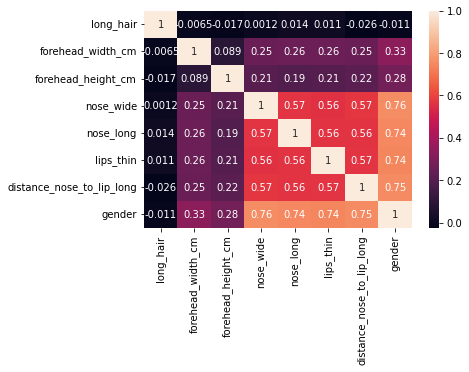

In [6]:
sns.heatmap(data=df.corr(), annot=True)

In [7]:
df.corr()['gender'].sort_values()

long_hair                   -0.010767
forehead_height_cm           0.277190
forehead_width_cm            0.334125
lips_thin                    0.743319
nose_long                    0.744147
distance_nose_to_lip_long    0.754850
nose_wide                    0.758502
gender                       1.000000
Name: gender, dtype: float64

Convert back 1s and 0s to 'Male' and 'Female'.

In [8]:
df['gender'] = df['gender'].apply(lambda x: 'Male' if x==1 else "Female")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### PREPARING THE DATA

In [9]:
X = df.drop('gender', axis=1)
y = df['gender']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### GRID SEARCH TO FIND BEST MODEL

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

params = {'n_estimators': [64,100,128,200],
          'max_features': ['sqrt', 'log2']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfc, params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

### PERFORMANCE EVALUATION

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

##### TRAIN DATA

In [12]:
train_y_pred = grid.predict(X_train)
print(classification_report(y_train, train_y_pred))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1996
        Male       1.00      1.00      1.00      2004

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



##### TEST DATA

In [13]:
test_y_pred = grid.predict(X_test)
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       505
        Male       0.97      0.97      0.97       496

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



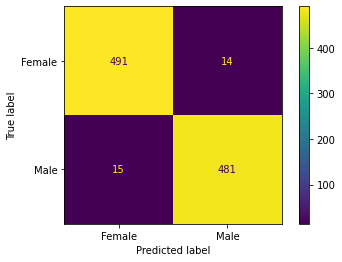

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, test_y_pred)